1472.0 1341.0


/home/luigi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/luigi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/luigi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


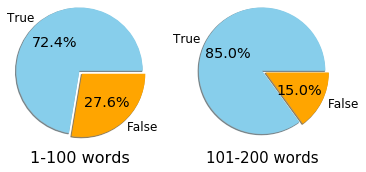

2227
2843


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sn
from sklearn.metrics import confusion_matrix
import itertools
from matplotlib.gridspec import GridSpec
categories = json.load(open("categories.json"))

dataset = pd.read_csv("classificationResults.csv").drop("Unnamed: 0",axis=1)


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'True', 'False'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
true1=float(len(dataset[dataset["match"]==1][dataset["size"]>0][dataset["size"]<=100]))
total1 = float(len(dataset[dataset["size"]>0][dataset["size"]<=100]))
true2=float(len(dataset[dataset["match"]==1][dataset["size"]>100][dataset["size"]<=200]))
total2 = float(len(dataset[dataset["size"]>100][dataset["size"]<=200]))
sizes1 = [true1/total1, (total1-true1)/total1]
sizes2 = [true2/total2, (total2-true2)/total2]

print(str(total1)+" "+str(total2))

the_grid = GridSpec(2, 2)
#plt.figure(figsize=(14, 8),dpi=500)

ax1 = plt.subplot(the_grid[0, 0], aspect=1)
patches, texts, autotexts = plt.pie(sizes1,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=["skyblue","orange"],radius=1.6)
# Make the labels on the small plot easier to read.
plt.xlabel("1-100 words",fontsize=15)
for t in texts:
    t.set_size('large')
for t in autotexts:
    t.set_size('x-large')

ax1.set_xlabel('1-100 words', fontsize = 16)
ax1.xaxis.set_label_coords(0.5, -0.3)


ax2 = plt.subplot(the_grid[0, 1], aspect=1)
patches, texts, autotexts = plt.pie(sizes2,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=["skyblue","orange"],radius=1.6)
# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('large')
for t in autotexts:
    t.set_size('x-large')

ax2.set_xlabel('101-200 words', fontsize = 15)
ax2.xaxis.set_label_coords(0.5, -0.3)

plt.savefig('image/testAccuracyGlobal.pdf')
plt.show()


print(len(dataset[dataset["match"]==1]))
print(len(dataset))



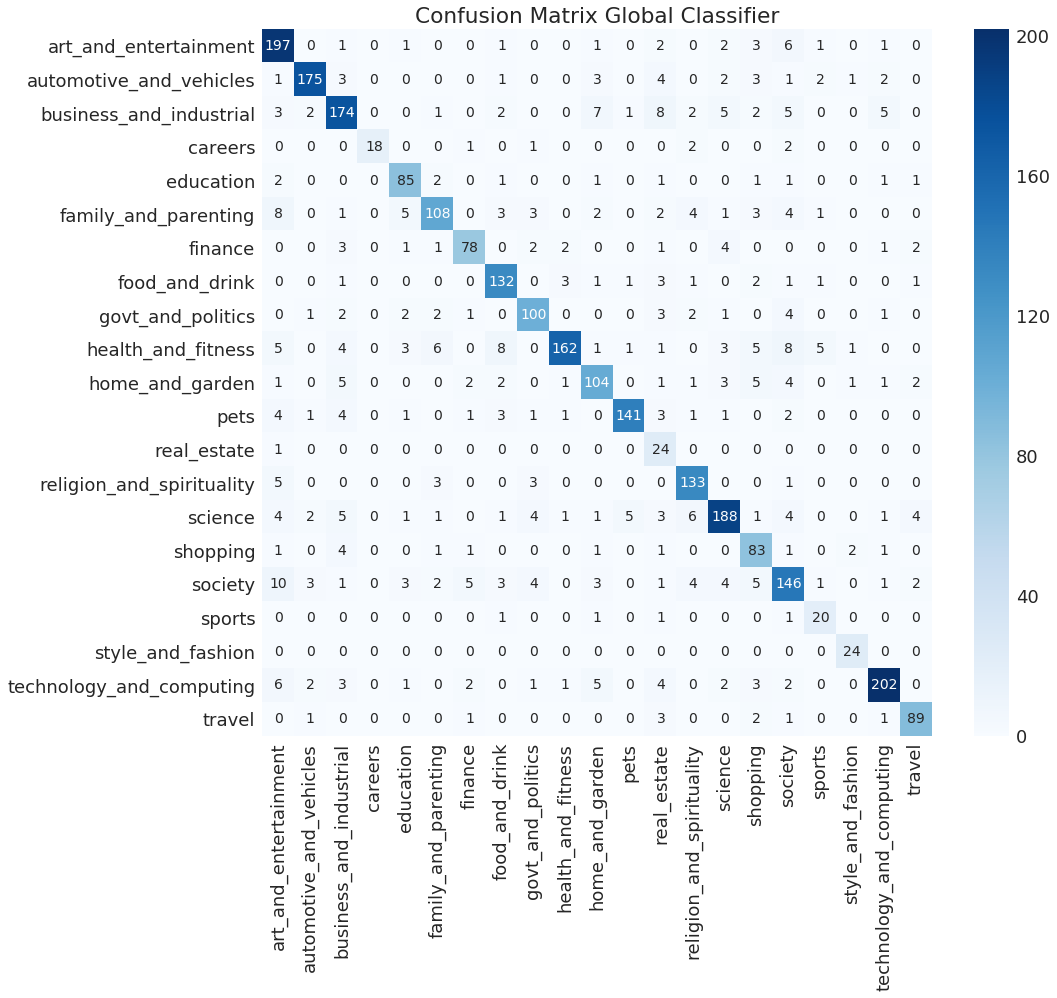

In [6]:
# Parte di codice per la confusion matrix

#This method return for any leaf a correct parent 
def fromLeafToParent(leaf, categories):
    for parent in categories:
        if leaf in categories[parent]:
            if parent != "root":
                return parent
            else:
                return leaf
    return None

def evaluateParentResult(leaf,label1):
    if leaf in categories:
        return leaf
    else:
        return dataset[0]

dataset["level1_Parent"] = dataset['label1'].apply(lambda x : x.split("/")[0])
dataset["level2_Parent"] = dataset['label2'].apply(lambda x : x.split("/")[0])
dataset["level3_Parent"] = dataset['label3'].apply(lambda x : x.split("/")[0]) 
evaluatedParent = list()
machedParent = list()

for index, row in dataset.iterrows():
    
    if row['parent'] == row['level1_Parent'] or row['parent'] == row['level2_Parent'] or row['parent'] == row['level3_Parent']:
        evaluatedParent.append(row['parent'])
        machedParent.append(1)
    else:
        evaluatedParent.append(row['level1_Parent'])
        machedParent.append(0)

        


# Compute confusion matrix
cnf_matrix = confusion_matrix(dataset['parent'], evaluatedParent)

np.set_printoptions(precision=2)    

df_cm = pd.DataFrame(cnf_matrix,index = categories["root"], columns = categories["root"])
plt.figure(figsize = (15,13))
sn.set(font_scale=1.8)
sn.heatmap(df_cm,cmap="Blues",annot=True,annot_kws={"size": 14},fmt='g')
plt.title("Confusion Matrix Global Classifier")
plt.savefig('image/confusion_matrix/global.pdf',bbox_inches='tight')
dataset["match_parent"] = machedParent

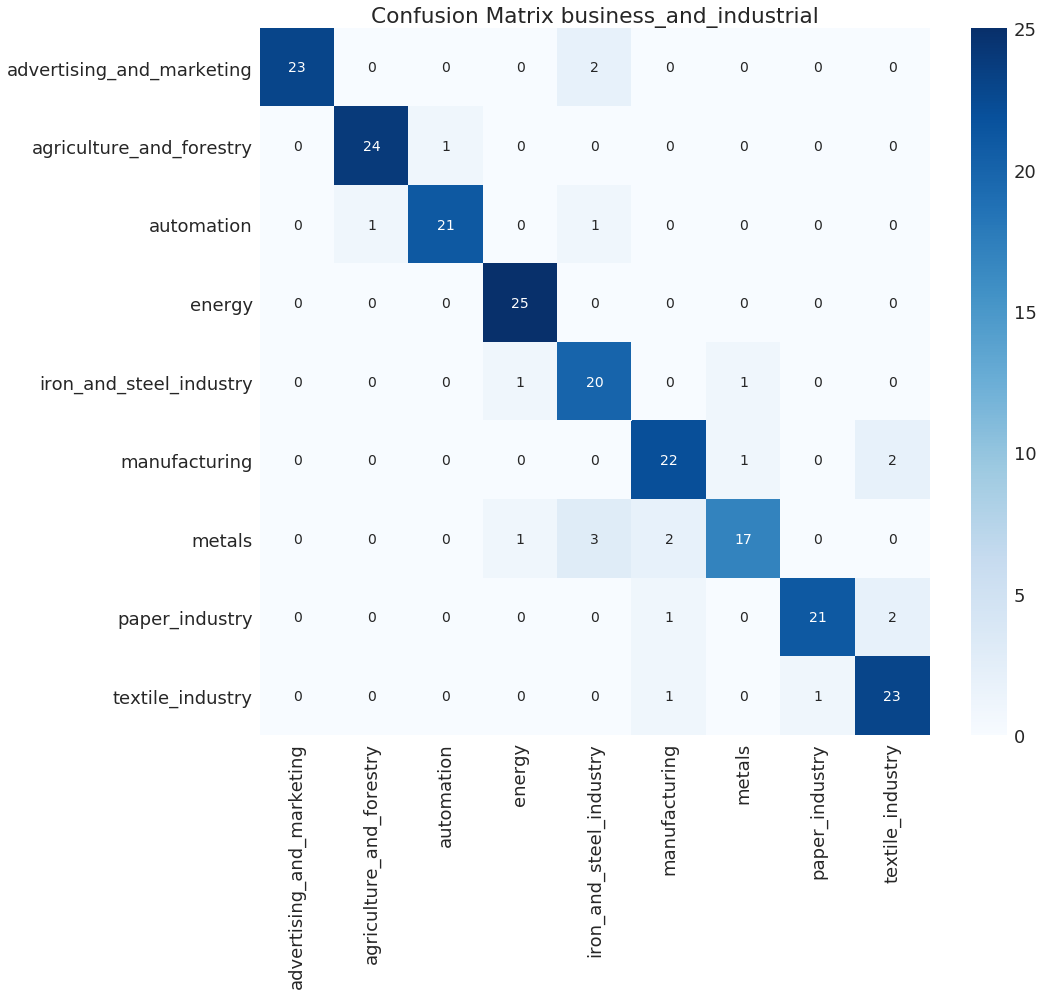

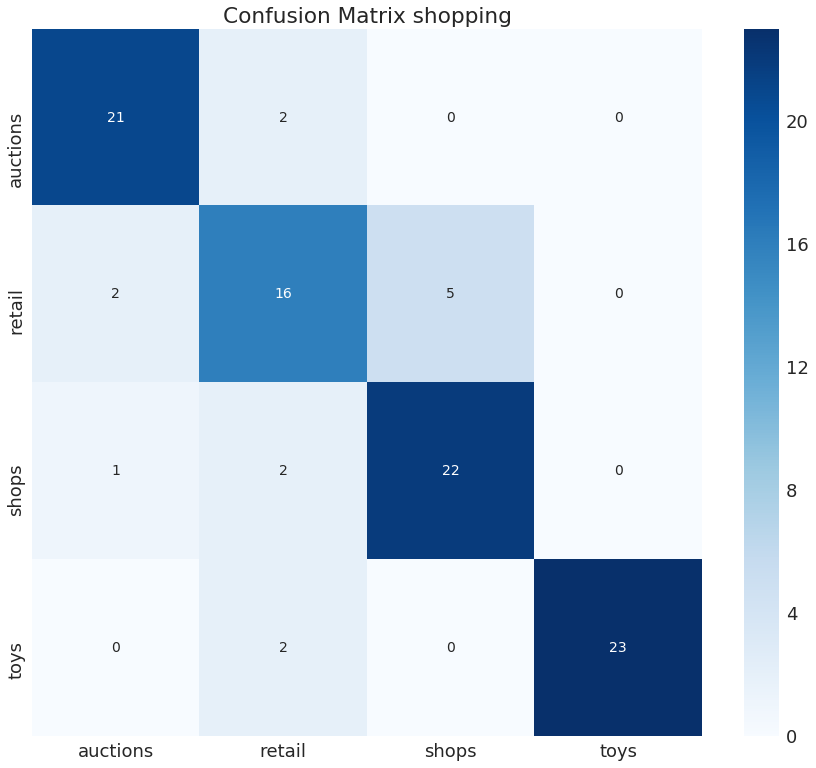

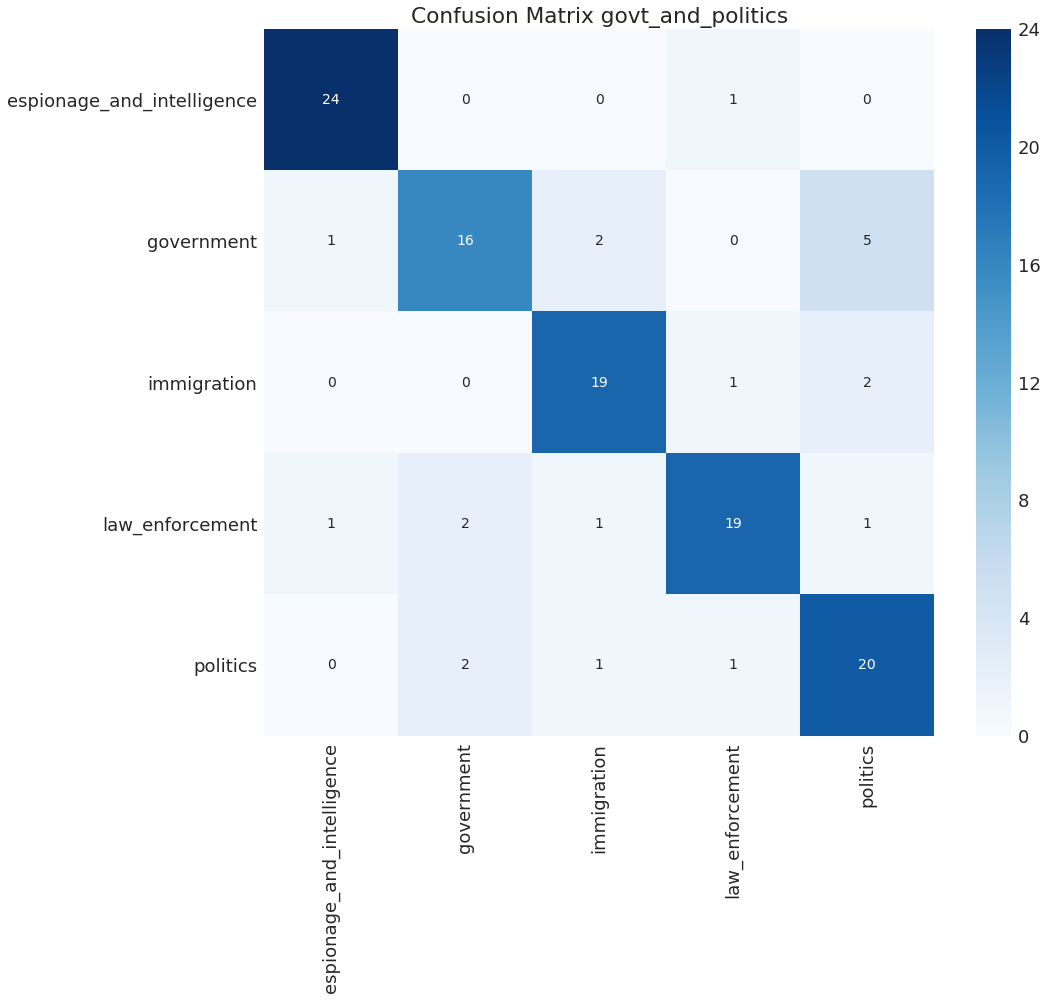

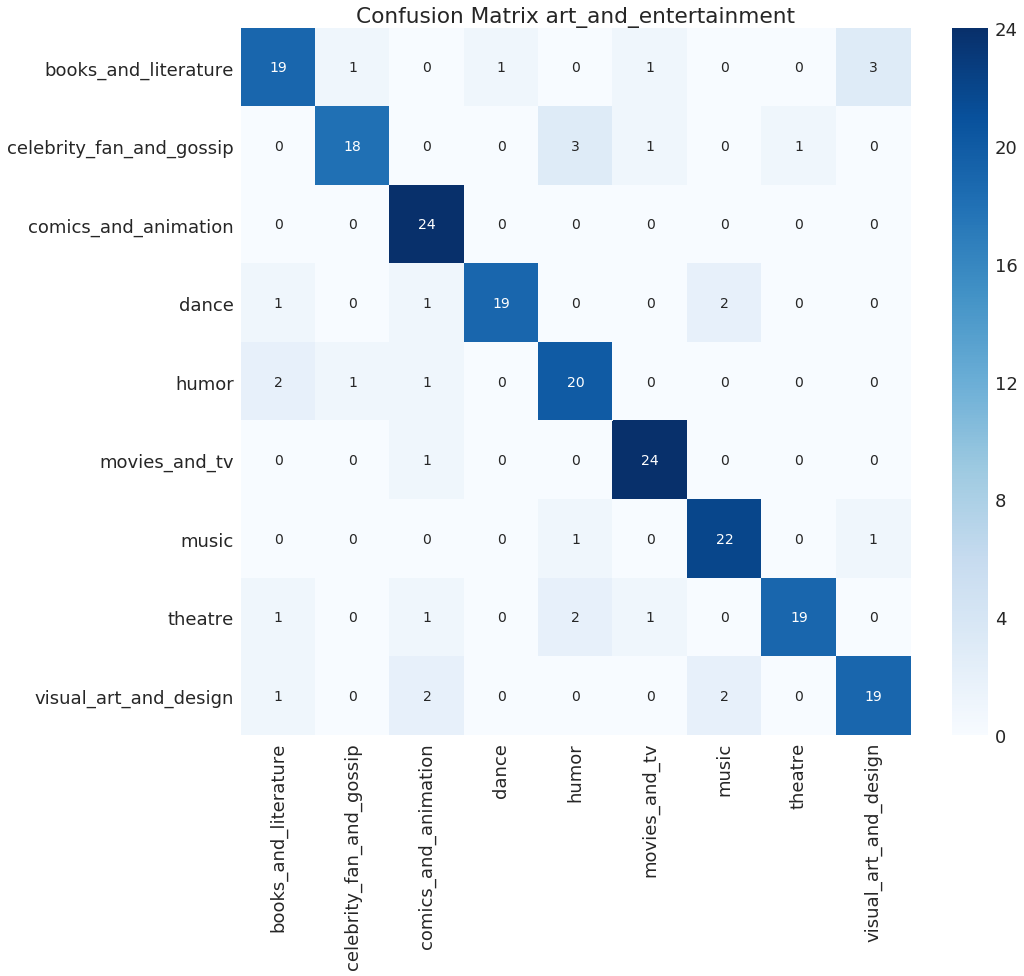

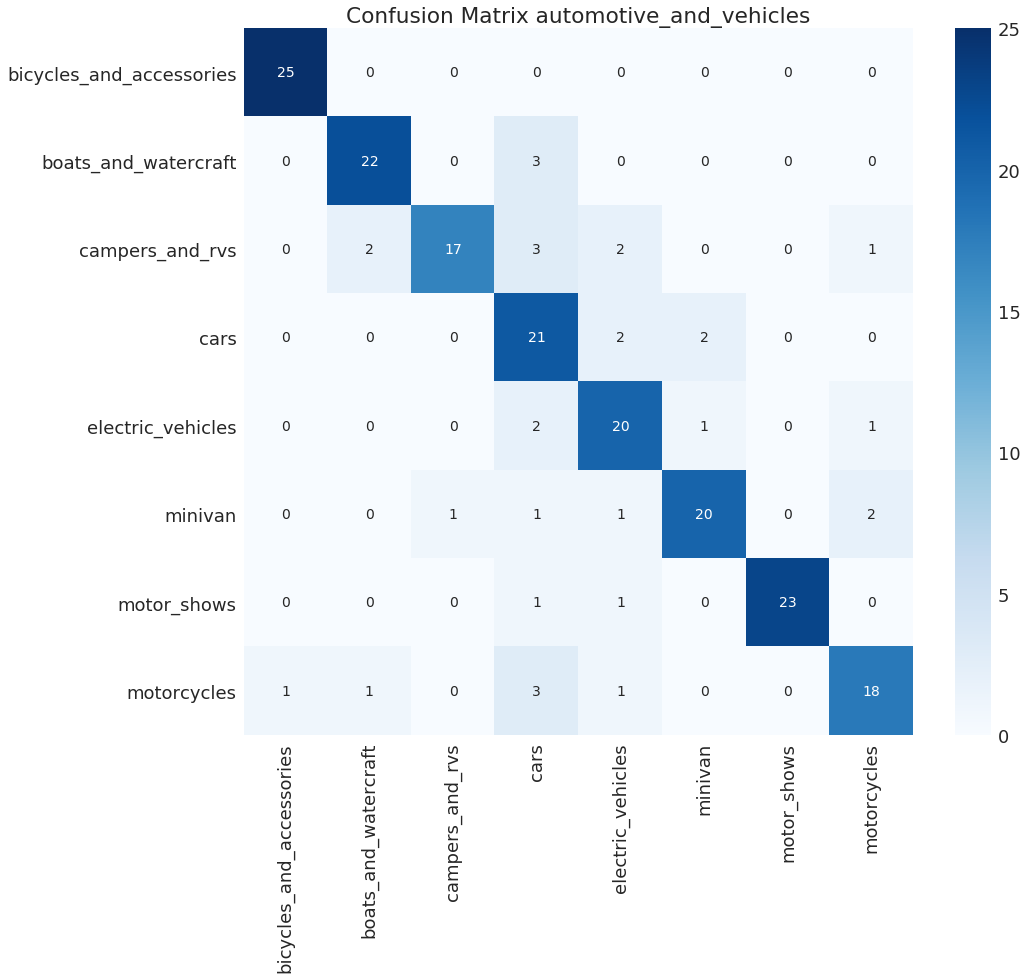

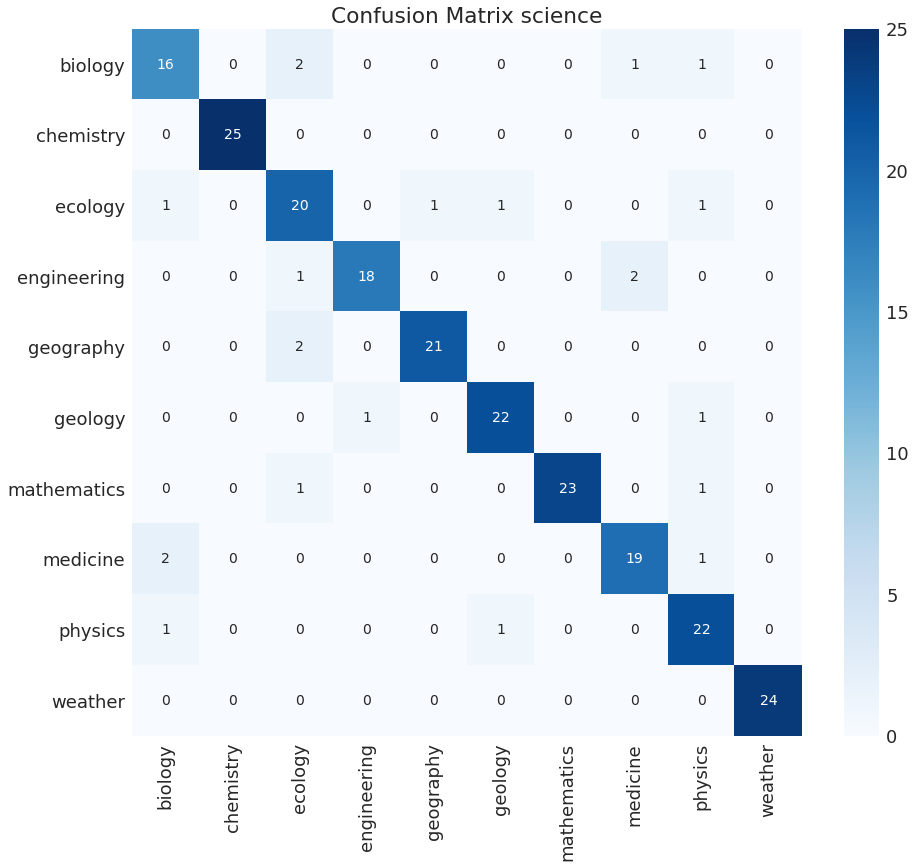

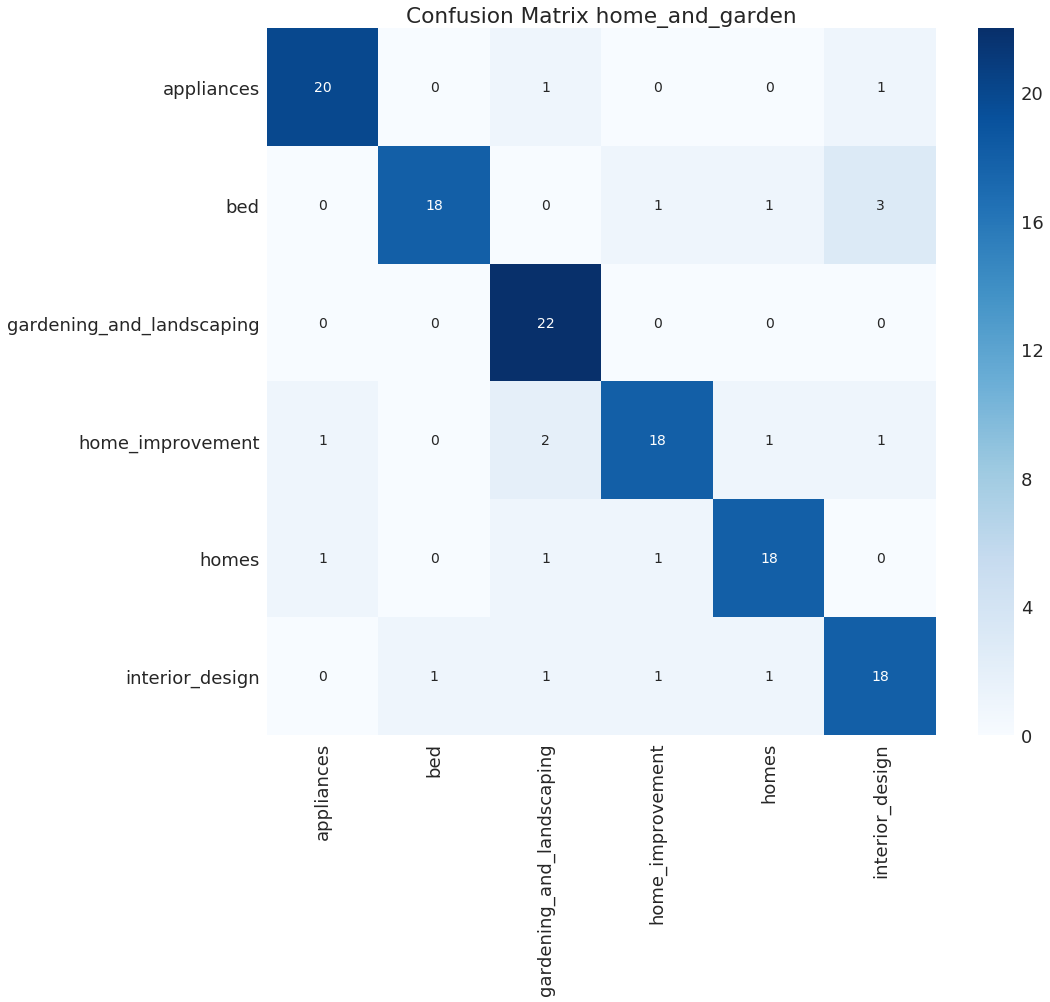

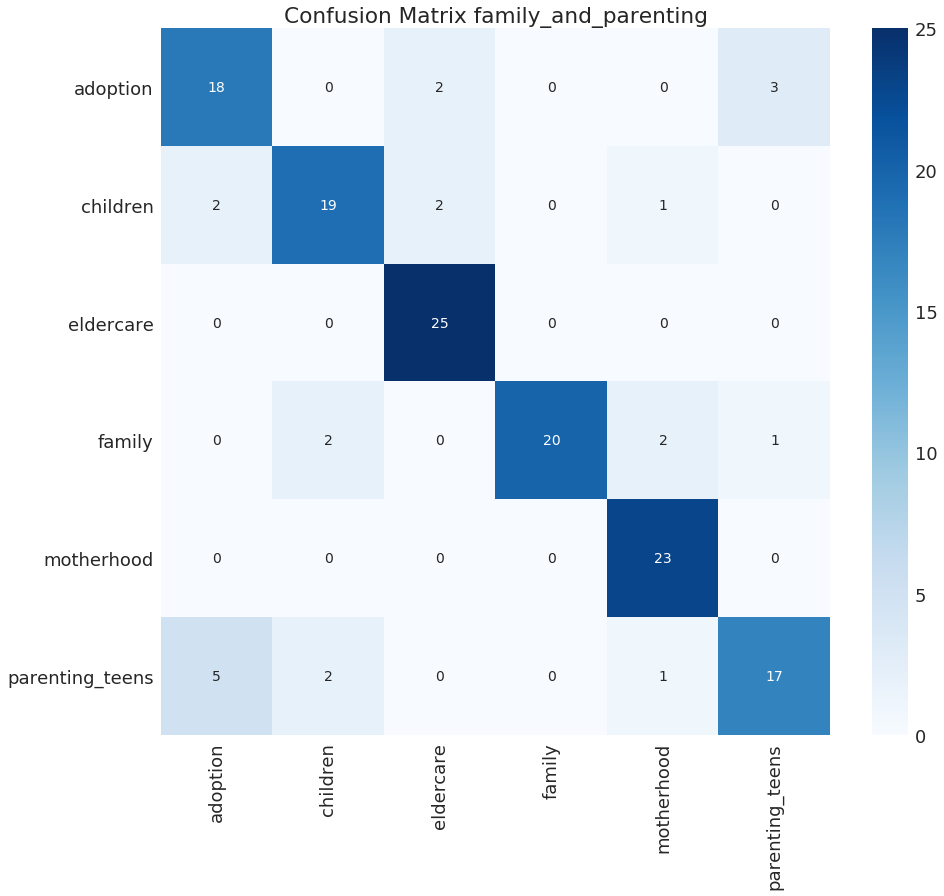

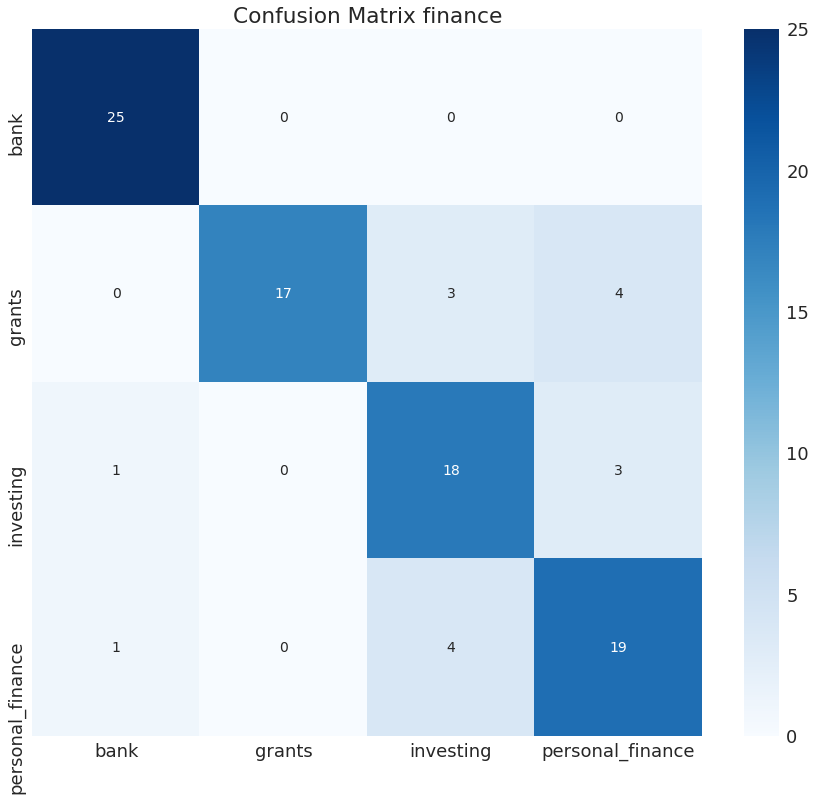

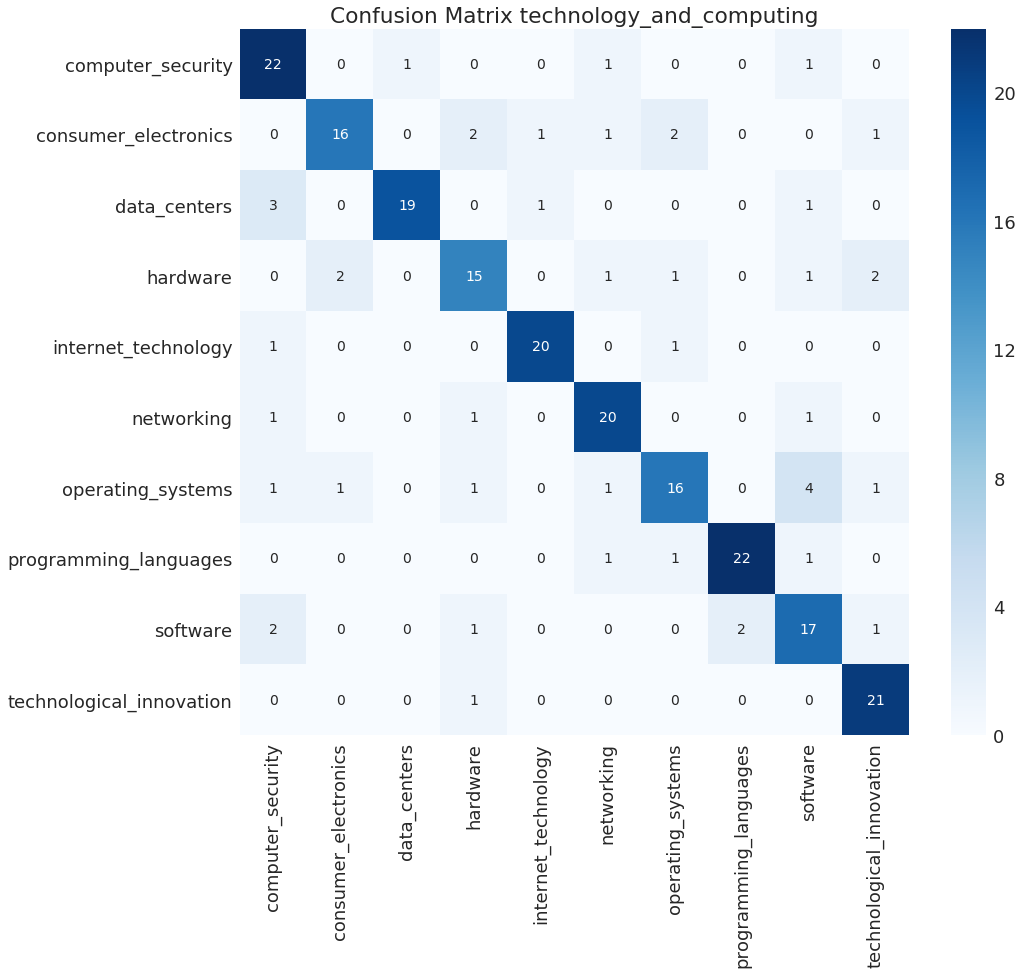

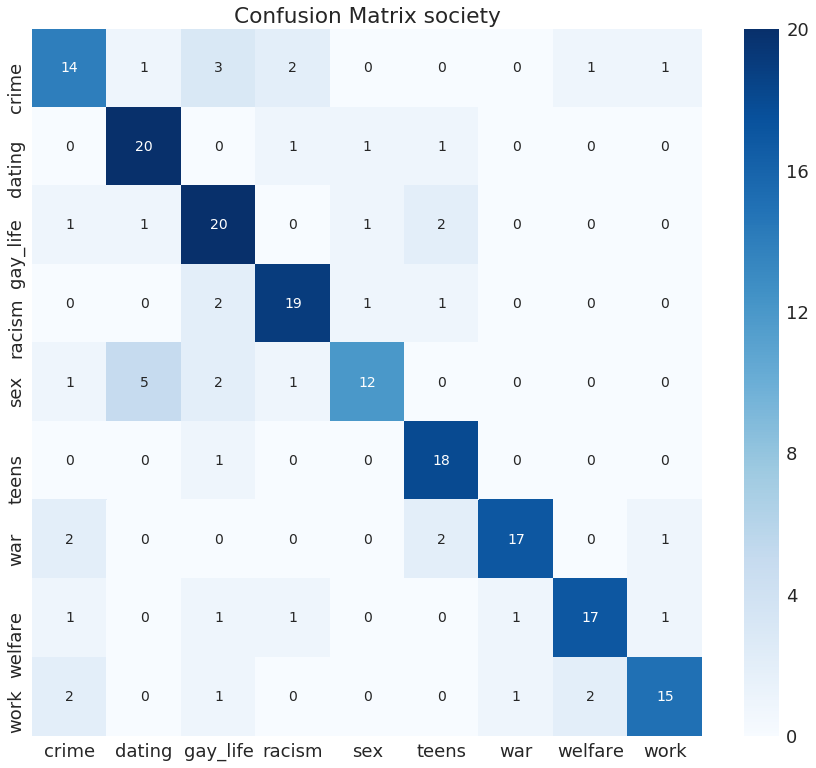

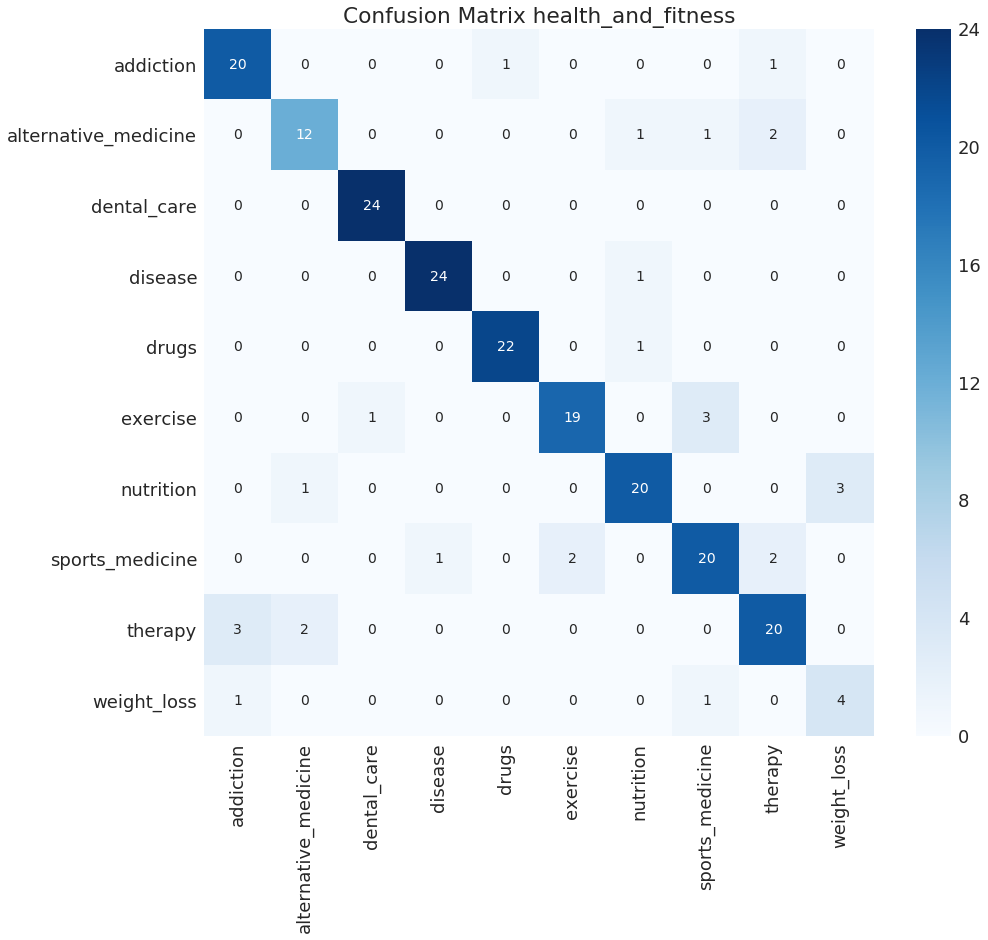

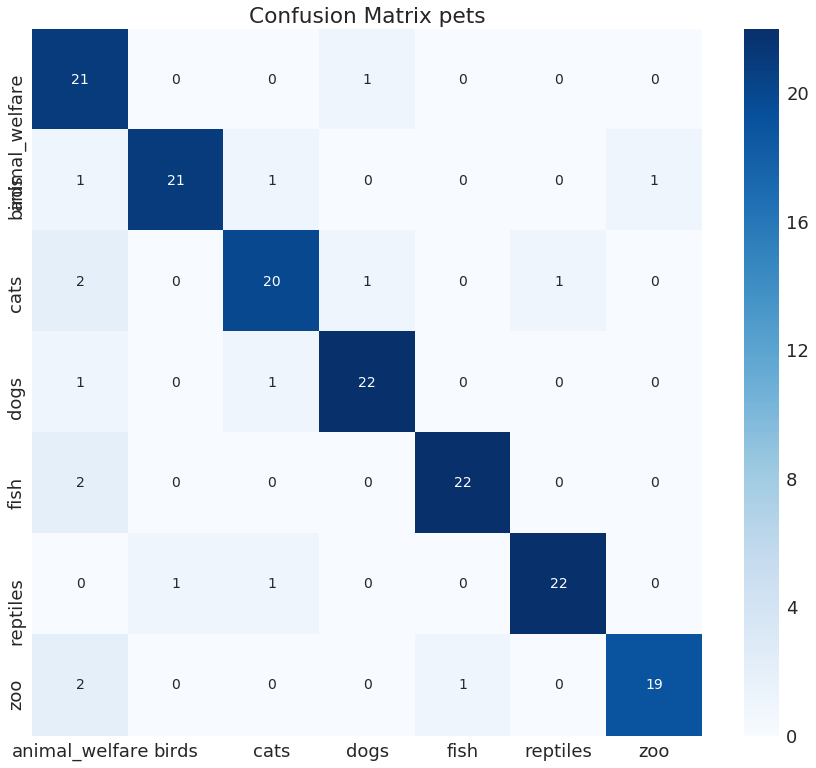

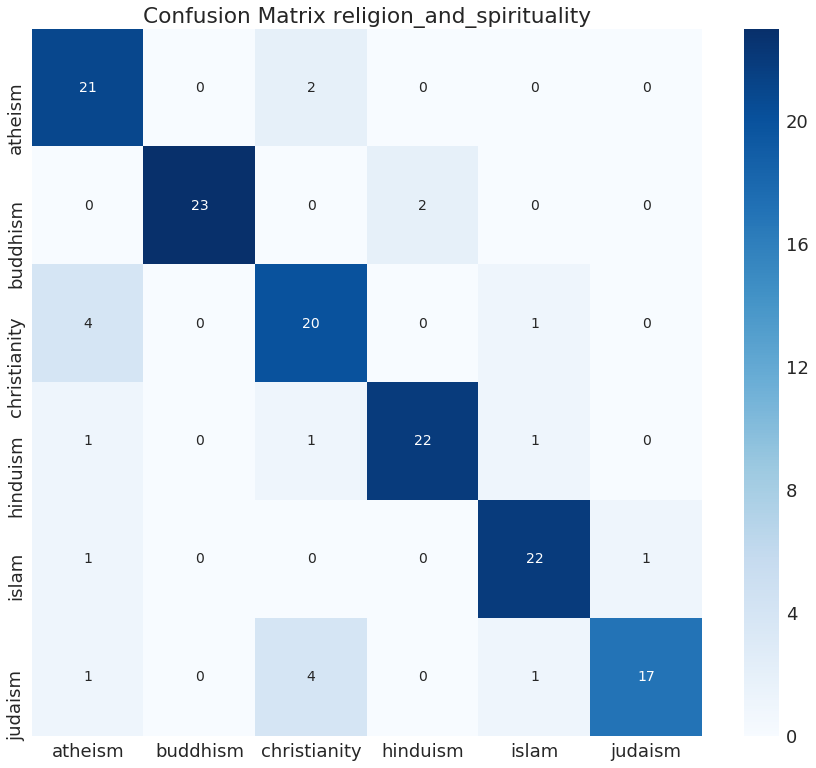

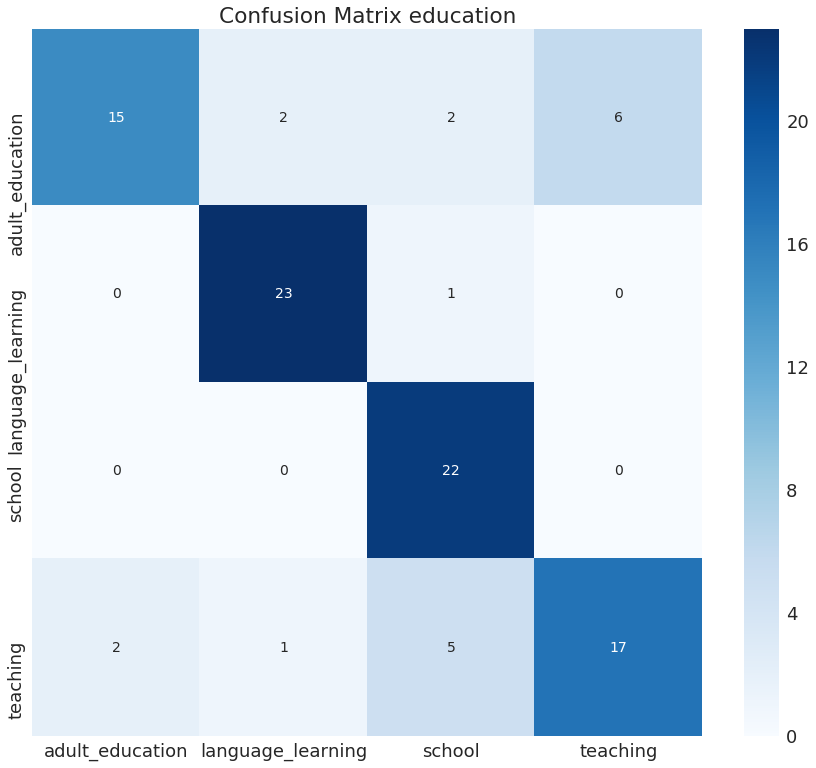

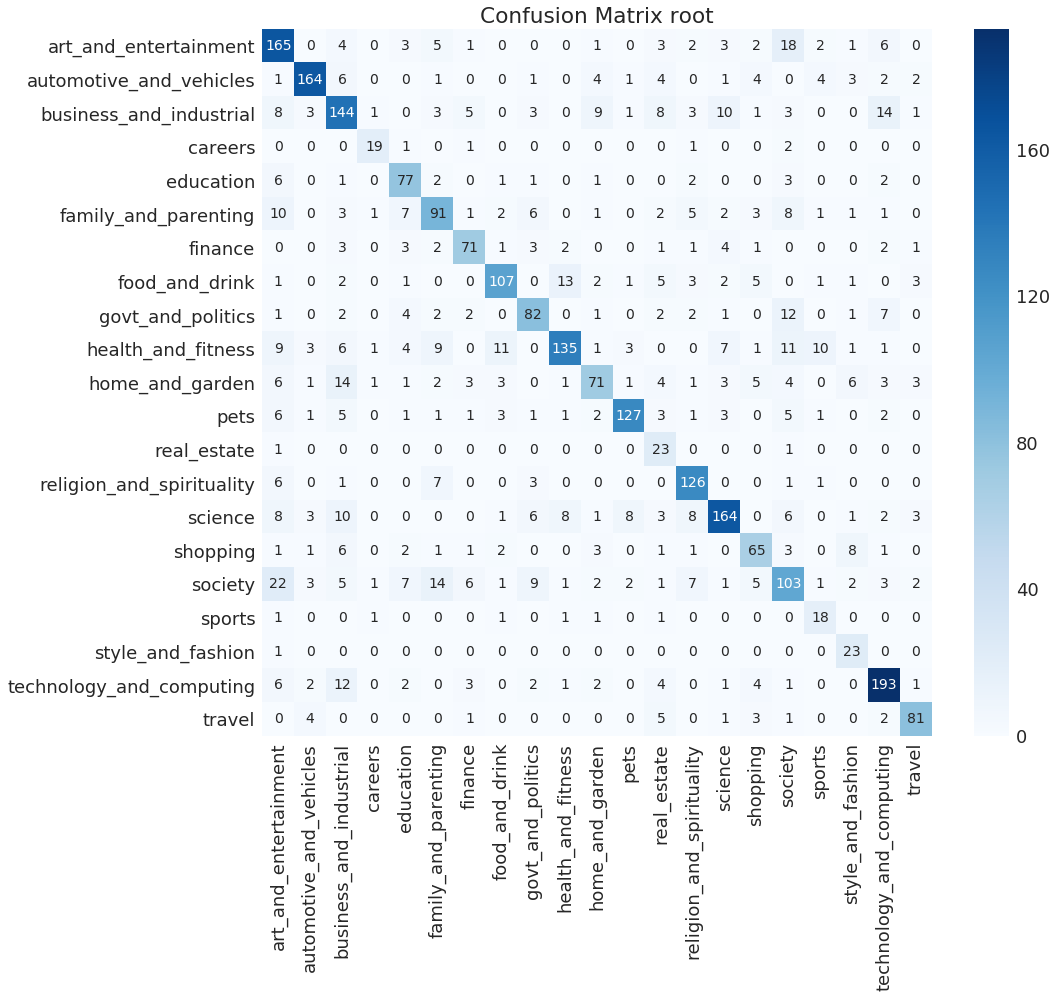

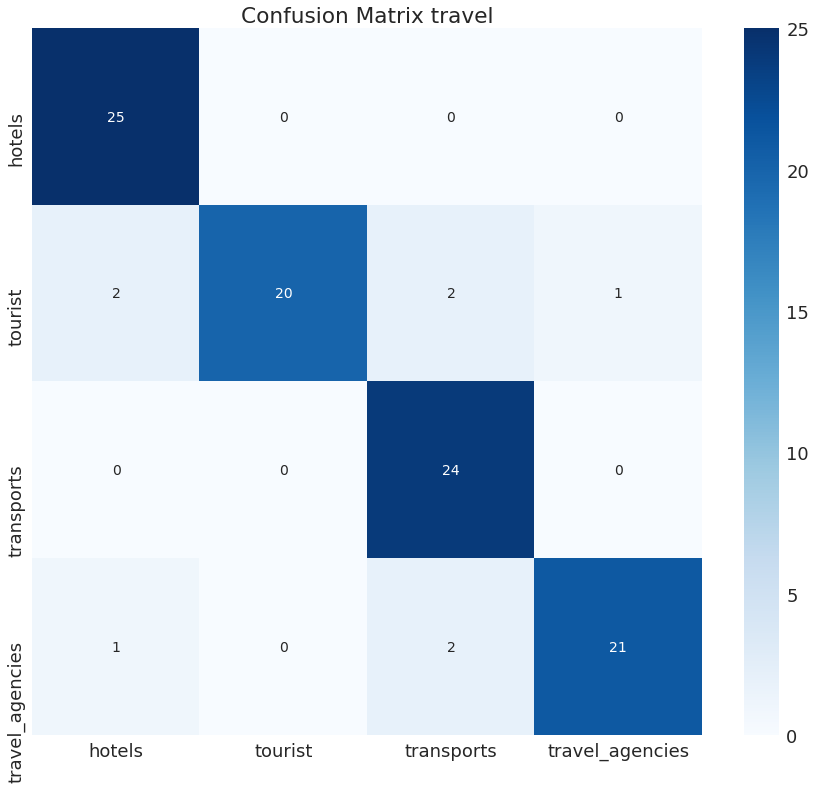

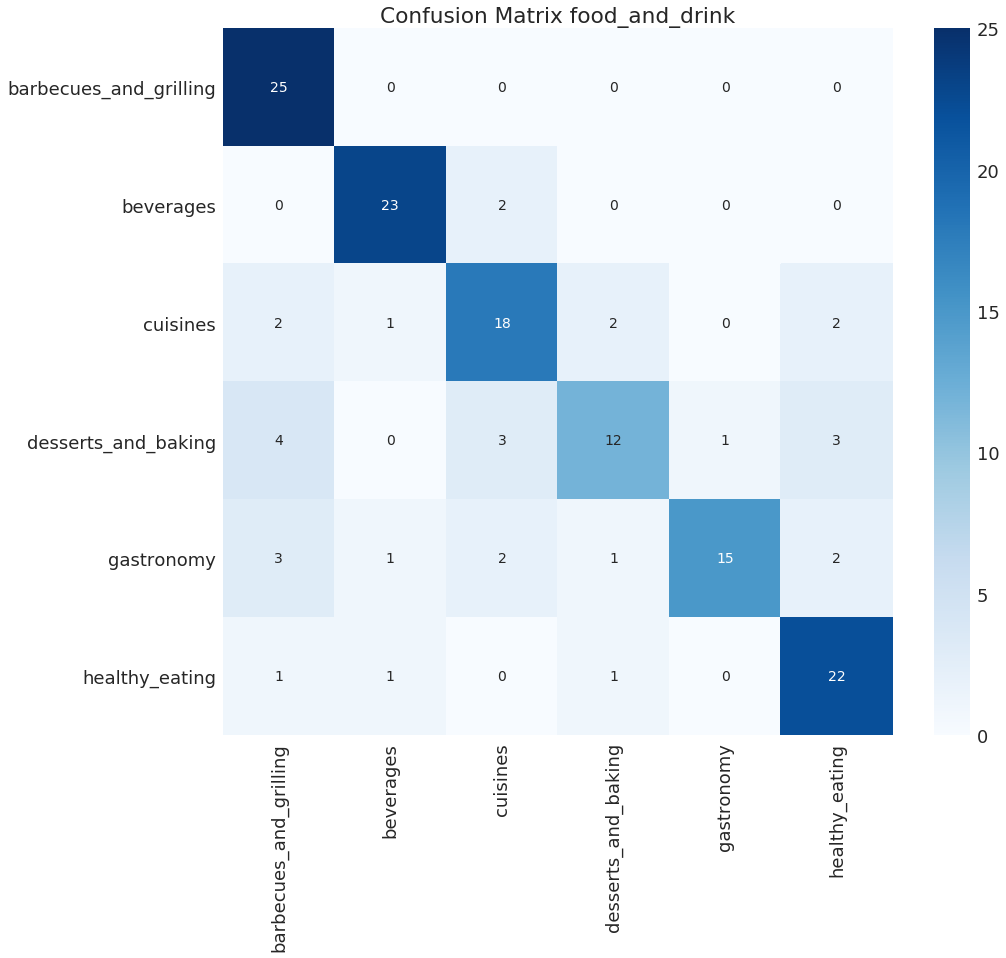

In [7]:
for category in categories:
    dataset = pd.read_csv("confusion_matrix/"+category+".csv").drop("Unnamed: 0",axis=1)

    cnf_matrix = confusion_matrix(dataset['real'], dataset['evaluated'],)
    np.set_printoptions(precision=2)    

    df_cm = pd.DataFrame(cnf_matrix,index = categories[category], columns = categories[category])
    plt.figure(figsize = (15,13))
    sn.set(font_scale=1.8)
    sn.heatmap(df_cm,cmap="Blues",annot=True,annot_kws={"size": 14},fmt='g')
    plt.title("Confusion Matrix "+category)
    plt.savefig('image/confusion_matrix/'+category+'.pdf',bbox_inches='tight')



In [8]:
dataset = pd.read_csv("classificationResults.csv").drop("Unnamed: 0",axis=1)

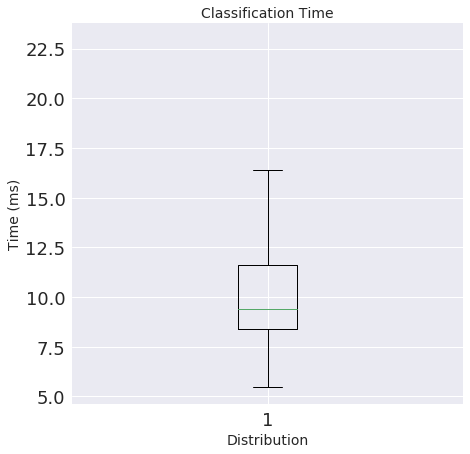

In [9]:
plt.figure(figsize = (7,7))
plt.boxplot(dataset["time"]*100)
plt.title("Classification Time",fontsize=14)
plt.ylabel("Time (ms)",fontsize=14)
plt.xlabel("Distribution",fontsize=14)

plt.savefig('timeTest.pdf')